In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


# Important Imports

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/dataset_ML.csv')

In [ ]:
data.head()

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,key,mode,duration_ms,Popularity,values,pred,label,score,emotion_label,Hit
0,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,1,1,393640,77.0,1.000000,1,POSITIVE,0.998717,joy,Yes
1,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,2,1,222813,78.0,0.333333,0,NEGATIVE,0.999485,joy,Yes
2,our life together is so precious togetherwe ha...,"['britannique', 'british', 'classic pop and ro...",288.0,4,1981,4.8,81.29,28,"{'neg': 0.068, 'neu': 0.625, 'pos': 0.308, 'co...",(Just Like) Starting Over,...,9,1,236547,61.0,0.250000,1,POSITIVE,0.998593,joy,Yes
3,love is higher than a mountain love is thicker...,"['classic pop and rock', 'death by myocarditis']",224.1,8,1978,4.0,91.78,30,"{'neg': 0.062, 'neu': 0.7000000000000001, 'pos...",(Love Is) Thicker Than Water,...,6,0,255960,47.0,0.125000,1,POSITIVE,0.998285,sadness,Yes
4,sittin' in the morning suni'll be sittin' when...,"['american', 'blues', 'death by airplane', 'de...",223.2,4,1968,4.8,98.21,25,"{'neg': 0.018000000000000002, 'neu': 0.927, 'p...",(Sittin' On) The Dock Of The Bay,...,2,1,163756,80.0,0.250000,0,NEGATIVE,0.994735,joy,Yes


In [ ]:
data.shape

(1801, 45)

In [ ]:
data.columns

Index(['lyrics', 'genre', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_lines', 'sentiment', 'title', 'f_k_grade',
       'artist', 'difficult_words', 'num_dupes', 'number_of_tokens',
       'number_of_types', 'decades', 'stemmed_text', 'POS_tags', 'POS',
       'playlistID', 'TrackName', 'TrackID', 'SampleURL', 'ReleaseYear',
       'Genres', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key', 'mode', 'duration_ms', 'Popularity', 'values', 'pred', 'label',
       'score', 'emotion_label', 'Hit'],
      dtype='object')

In [ ]:
data = data.drop(['genre', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_lines', 'sentiment','f_k_grade', 'difficult_words', 'num_dupes', 'number_of_tokens',
       'number_of_types', 'decades', 'stemmed_text', 'POS_tags', 'POS','values', 'pred'], axis=1)

In [ ]:
data.head(5)

,lyrics,title,artist,playlistID,TrackName,TrackID,SampleURL,ReleaseYear,Genres,danceability,...,valence,tempo,key,mode,duration_ms,Popularity,label,score,emotion_label,Hit
0,look into my eyes you will seewhat you mean t...,(Everything I Do) I Do It For You,Bryan Adams,2A4YfptOVIqtSvTQ6d32sm,(Everything I Do) I Do It For You,1Eb90nmqTrxylKFhcUzW8P,https://p.scdn.co/mp3-preview/b69589f6d0950835...,1991-09-24,"['canadian pop', 'canadian singer-songwriter',...",0.533,...,0.299,131.229,1,1,393640,77.0,POSITIVE,0.998717,joy,Yes
1,i can't get no satisfactioni can't get no sati...,(I Can't Get No) Satisfaction,Rolling Stones,2A4YfptOVIqtSvTQ6d32sm,(I Can't Get No) Satisfaction - Mono Version,2PzU4IB8Dr6mxV3lHuaG34,https://p.scdn.co/mp3-preview/22782e4be2eb4daa...,1965-07-30,"['album rock', 'british invasion', 'classic ro...",0.723,...,0.931,136.302,2,1,222813,78.0,NEGATIVE,0.999485,joy,Yes
2,our life together is so precious togetherwe ha...,(Just Like) Starting Over,John Lennon,2A4YfptOVIqtSvTQ6d32sm,(Just Like) Starting Over - Remastered 2010,5y0YreEOnQiKFAnCrcFIXz,https://p.scdn.co/mp3-preview/a79a8808230f4ded...,1980-11-17,"['beatlesque', 'classic rock', 'rock']",0.701,...,0.421,99.104,9,1,236547,61.0,POSITIVE,0.998593,joy,Yes
3,love is higher than a mountain love is thicker...,(Love Is) Thicker Than Water,Andy Gibb,2A4YfptOVIqtSvTQ6d32sm,(Love Is) Thicker Than Water,3jdBf1cJ2QmTzNUixplppA,https://p.scdn.co/mp3-preview/ce0e47fb6c886802...,1977-01-01,"['disco', 'mellow gold', 'soft rock']",0.582,...,0.528,96.361,6,0,255960,47.0,POSITIVE,0.998285,sadness,Yes
4,sittin' in the morning suni'll be sittin' when...,(Sittin' On) The Dock Of The Bay,Otis Redding,2A4YfptOVIqtSvTQ6d32sm,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,https://p.scdn.co/mp3-preview/404976a4a56d8c1c...,1968,"['classic soul', 'memphis soul', 'soul', 'soul...",0.769,...,0.535,103.621,2,1,163756,80.0,NEGATIVE,0.994735,joy,Yes


In [ ]:
data = data.drop(['playlistID', 'TrackName', 'SampleURL', 'ReleaseYear', 'Genres', 'score'], axis=1)

In [ ]:
data.head(5)

,lyrics,title,artist,TrackID,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,Popularity,label,emotion_label,Hit
0,look into my eyes you will seewhat you mean t...,(Everything I Do) I Do It For You,Bryan Adams,1Eb90nmqTrxylKFhcUzW8P,0.533,0.360,-12.633,0.0282,0.0805,0.000010,0.0631,0.299,131.229,1,1,393640,77.0,POSITIVE,joy,Yes
1,i can't get no satisfactioni can't get no sati...,(I Can't Get No) Satisfaction,Rolling Stones,2PzU4IB8Dr6mxV3lHuaG34,0.723,0.863,-7.890,0.0338,0.0383,0.031700,0.1280,0.931,136.302,2,1,222813,78.0,NEGATIVE,joy,Yes
2,our life together is so precious togetherwe ha...,(Just Like) Starting Over,John Lennon,5y0YreEOnQiKFAnCrcFIXz,0.701,0.790,-6.160,0.0725,0.3010,0.000061,0.1790,0.421,99.104,9,1,236547,61.0,POSITIVE,joy,Yes
3,love is higher than a mountain love is thicker...,(Love Is) Thicker Than Water,Andy Gibb,3jdBf1cJ2QmTzNUixplppA,0.582,0.462,-9.882,0.0254,0.1370,0.000050,0.0755,0.528,96.361,6,0,255960,47.0,POSITIVE,sadness,Yes
4,sittin' in the morning suni'll be sittin' when...,(Sittin' On) The Dock Of The Bay,Otis Redding,3zBhihYUHBmGd2bcQIobrF,0.769,0.367,-11.226,0.0312,0.6840,0.000016,0.0810,0.535,103.621,2,1,163756,80.0,NEGATIVE,joy,Yes


In [ ]:
data.Hit = data.Hit.replace({'Yes': 1, 'No': 0})

In [ ]:
from collections import Counter

Counter(data.Hit)

Counter({1: 912, 0: 889})

In [ ]:
data.label = data.label.replace({'POSITIVE': 1, 'NEGATIVE': 0})

In [ ]:
Counter(data.label)

Counter({1: 1346, 0: 455})

In [ ]:
Counter(data.emotion_label)

Counter({' joy': 867,
         ' sadness': 436,
         ' fear': 132,
         ' love': 142,
         ' anger': 209,
         ' surprise': 15})

In [ ]:
data.emotion_label = data.emotion_label.replace({' sadness': 0, ' joy': 1, ' love': 2, ' anger': 3, ' fear': 4, ' surprise': 5})

In [ ]:
Counter(data.emotion_label)

Counter({1: 867, 0: 436, 4: 132, 2: 142, 3: 209, 5: 15})

In [ ]:
data.head(5)

,lyrics,title,artist,TrackID,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,Popularity,label,emotion_label,Hit
0,look into my eyes you will seewhat you mean t...,(Everything I Do) I Do It For You,Bryan Adams,1Eb90nmqTrxylKFhcUzW8P,0.533,0.360,-12.633,0.0282,0.0805,0.000010,0.0631,0.299,131.229,1,1,393640,77.0,POSITIVE,joy,Yes
1,i can't get no satisfactioni can't get no sati...,(I Can't Get No) Satisfaction,Rolling Stones,2PzU4IB8Dr6mxV3lHuaG34,0.723,0.863,-7.890,0.0338,0.0383,0.031700,0.1280,0.931,136.302,2,1,222813,78.0,NEGATIVE,joy,Yes
2,our life together is so precious togetherwe ha...,(Just Like) Starting Over,John Lennon,5y0YreEOnQiKFAnCrcFIXz,0.701,0.790,-6.160,0.0725,0.3010,0.000061,0.1790,0.421,99.104,9,1,236547,61.0,POSITIVE,joy,Yes
3,love is higher than a mountain love is thicker...,(Love Is) Thicker Than Water,Andy Gibb,3jdBf1cJ2QmTzNUixplppA,0.582,0.462,-9.882,0.0254,0.1370,0.000050,0.0755,0.528,96.361,6,0,255960,47.0,POSITIVE,sadness,Yes
4,sittin' in the morning suni'll be sittin' when...,(Sittin' On) The Dock Of The Bay,Otis Redding,3zBhihYUHBmGd2bcQIobrF,0.769,0.367,-11.226,0.0312,0.6840,0.000016,0.0810,0.535,103.621,2,1,163756,80.0,NEGATIVE,joy,Yes


# Check for null values

In [ ]:
df = data.copy()

In [ ]:
df.isna().sum()

lyrics              0
title               0
artist              0
TrackID             0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
key                 0
mode                0
duration_ms         0
Popularity          0
label               0
emotion_label       0
Hit                 0
dtype: int64

# Getting insights of the data and its features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lyrics            1801 non-null   object 
 1   title             1801 non-null   object 
 2   artist            1801 non-null   object 
 3   TrackID           1801 non-null   object 
 4   danceability      1801 non-null   float64
 5   energy            1801 non-null   float64
 6   loudness          1801 non-null   float64
 7   speechiness       1801 non-null   float64
 8   acousticness      1801 non-null   float64
 9   instrumentalness  1801 non-null   float64
 10  liveness          1801 non-null   float64
 11  valence           1801 non-null   float64
 12  tempo             1801 non-null   float64
 13  key               1801 non-null   int64  
 14  mode              1801 non-null   int64  
 15  duration_ms       1801 non-null   int64  
 16  Popularity        1801 non-null   float64


In [ ]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,Popularity
count,1801.000000,1801.000000,1801.00000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000
mean,0.620918,0.627535,-8.40445,0.065548,0.253917,0.014662,0.177682,0.609702,119.029904,5.255414,0.717379,238226.549139,60.091616
std,0.151051,0.196532,3.54855,0.068454,0.257091,0.081908,0.148918,0.241335,27.471619,3.558441,0.450399,62016.504439,16.570118
min,0.000000,0.026400,-24.33600,0.000000,0.000024,0.000000,0.018200,0.000000,0.000000,0.000000,0.000000,78200.000000,0.000000
25%,0.530000,0.490000,-10.78200,0.031700,0.041900,0.000000,0.083800,0.424000,99.009000,2.000000,0.000000,201827.000000,51.000000
50%,0.633000,0.643000,-7.78300,0.040500,0.154000,0.000003,0.120000,0.639000,117.287000,5.000000,1.000000,234000.000000,63.000000
75%,0.725000,0.788000,-5.56200,0.061900,0.409000,0.000260,0.227000,0.813000,132.923000,8.000000,1.000000,266867.000000,72.000000
max,0.975000,0.997000,-1.35700,0.576000,0.969000,0.929000,0.958000,0.985000,210.851000,11.000000,1.000000,830400.000000,90.000000


In [ ]:
df.nunique()

lyrics              1797
title               1740
artist               857
TrackID             1798
danceability         595
energy               700
loudness            1658
speechiness          649
acousticness        1123
instrumentalness     899
liveness             792
valence              760
tempo               1774
key                   12
mode                   2
duration_ms         1696
Popularity            86
label                  2
emotion_label          6
Hit                    2
dtype: int64

In [ ]:
df.Hit.value_counts()

Yes    912
No     889
Name: Hit, dtype: int64

# Correlation Matrix

<ipython-input-49-cb2350b31a03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = df.corr()


<Axes: >

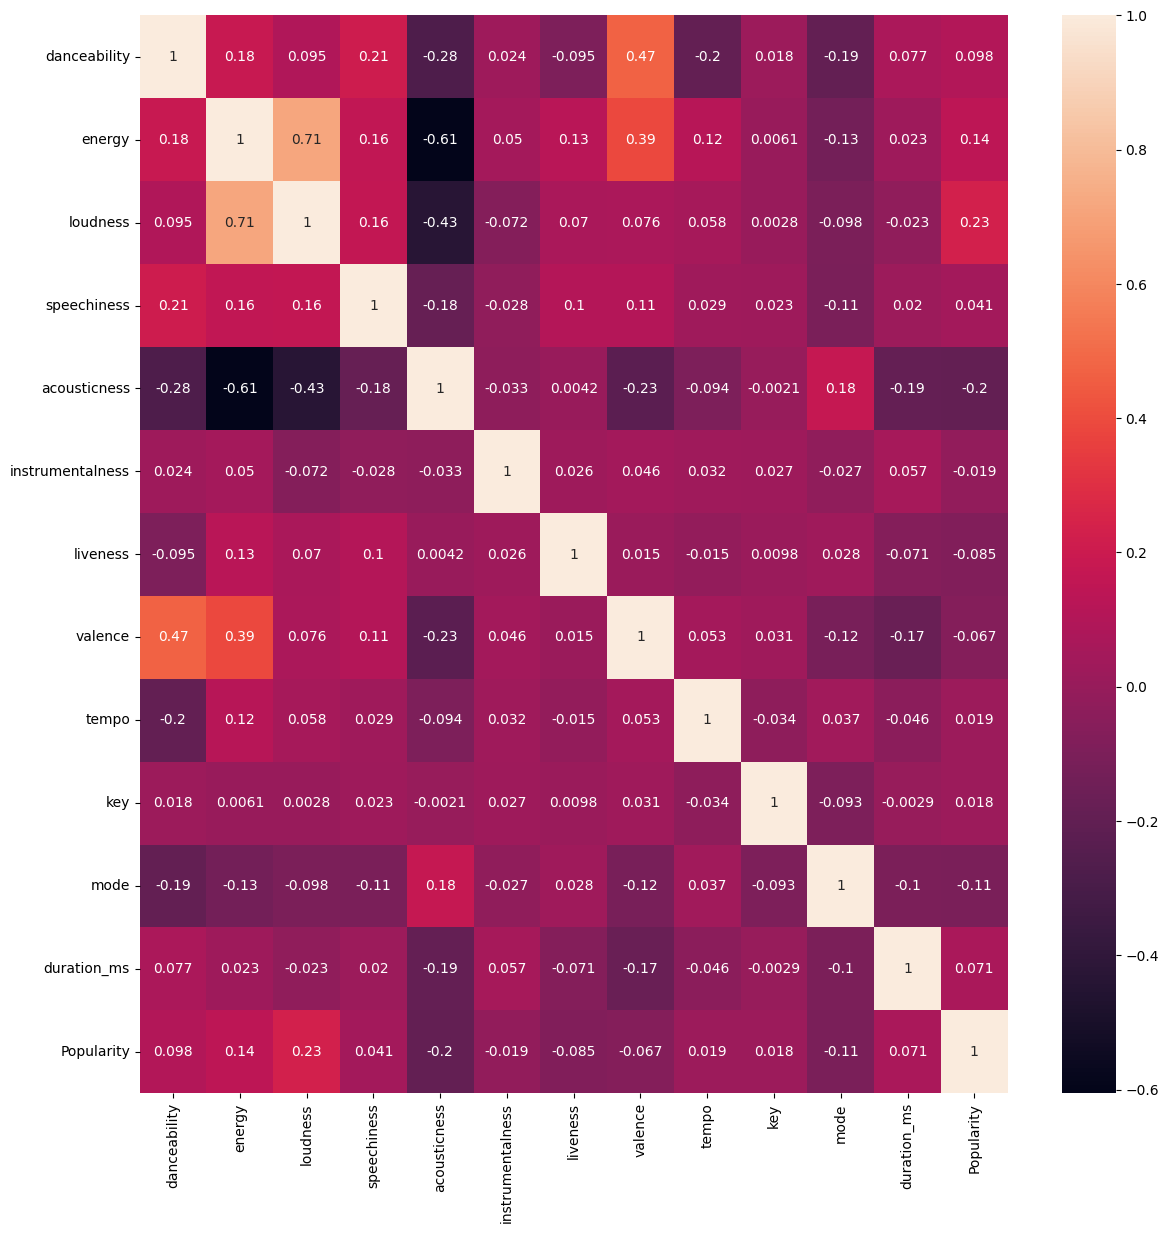

In [ ]:
plt.figure(figsize=(14,14))
correl = df.corr()
sns.heatmap(correl,annot=True)

In [ ]:
correl

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,Popularity
danceability,1.000000,0.182428,0.095086,0.208557,-0.276779,0.024106,-0.095157,0.472004,-0.195185,0.017778,-0.192959,0.077231,0.097884
energy,0.182428,1.000000,0.712304,0.158530,-0.605548,0.049811,0.126605,0.387512,0.121230,0.006101,-0.131870,0.023410,0.142631
loudness,0.095086,0.712304,1.000000,0.160644,-0.429981,-0.071859,0.069698,0.076098,0.058094,0.002820,-0.098064,-0.023060,0.229280
speechiness,0.208557,0.158530,0.160644,1.000000,-0.180764,-0.028150,0.103860,0.106324,0.029052,0.022879,-0.109627,0.020300,0.041475
acousticness,-0.276779,-0.605548,-0.429981,-0.180764,1.000000,-0.032947,0.004185,-0.226964,-0.094245,-0.002150,0.176800,-0.188602,-0.195651
instrumentalness,0.024106,0.049811,-0.071859,-0.028150,-0.032947,1.000000,0.025930,0.046238,0.031864,0.026888,-0.027200,0.057365,-0.018748
liveness,-0.095157,0.126605,0.069698,0.103860,0.004185,0.025930,1.000000,0.014874,-0.015463,0.009751,0.028011,-0.071168,-0.084678
valence,0.472004,0.387512,0.076098,0.106324,-0.226964,0.046238,0.014874,1.000000,0.052633,0.030809,-0.115140,-0.169408,-0.066597
tempo,-0.195185,0.121230,0.058094,0.029052,-0.094245,0.031864,-0.015463,0.052633,1.000000,-0.034448,0.037303,-0.045535,0.018591
key,0.017778,0.006101,0.002820,0.022879,-0.002150,0.026888,0.009751,0.030809,-0.034448,1.000000,-0.092896,-0.002883,0.017608


# Seperative the categorical and numeric features

In [ ]:
df.nunique()

lyrics              1797
title               1740
artist               857
TrackID             1798
danceability         595
energy               700
loudness            1658
speechiness          649
acousticness        1123
instrumentalness     899
liveness             792
valence              760
tempo               1774
key                   12
mode                   2
duration_ms         1696
Popularity            86
label                  2
emotion_label          6
Hit                    2
dtype: int64

In [ ]:
categorical = [x for x in df.columns if df[x].nunique()< 15]

In [ ]:
categorical

['key', 'mode', 'label', 'emotion_label', 'Hit']

In [ ]:
df = df.drop(['lyrics'], axis=1)

In [ ]:
df = df.drop(['title', 'artist', 'TrackID'], axis=1)

In [ ]:
numeric = [x for x in df.columns if df[x].nunique() > 15]

In [ ]:
numeric

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'Popularity']

In [ ]:
numeric

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'Popularity']

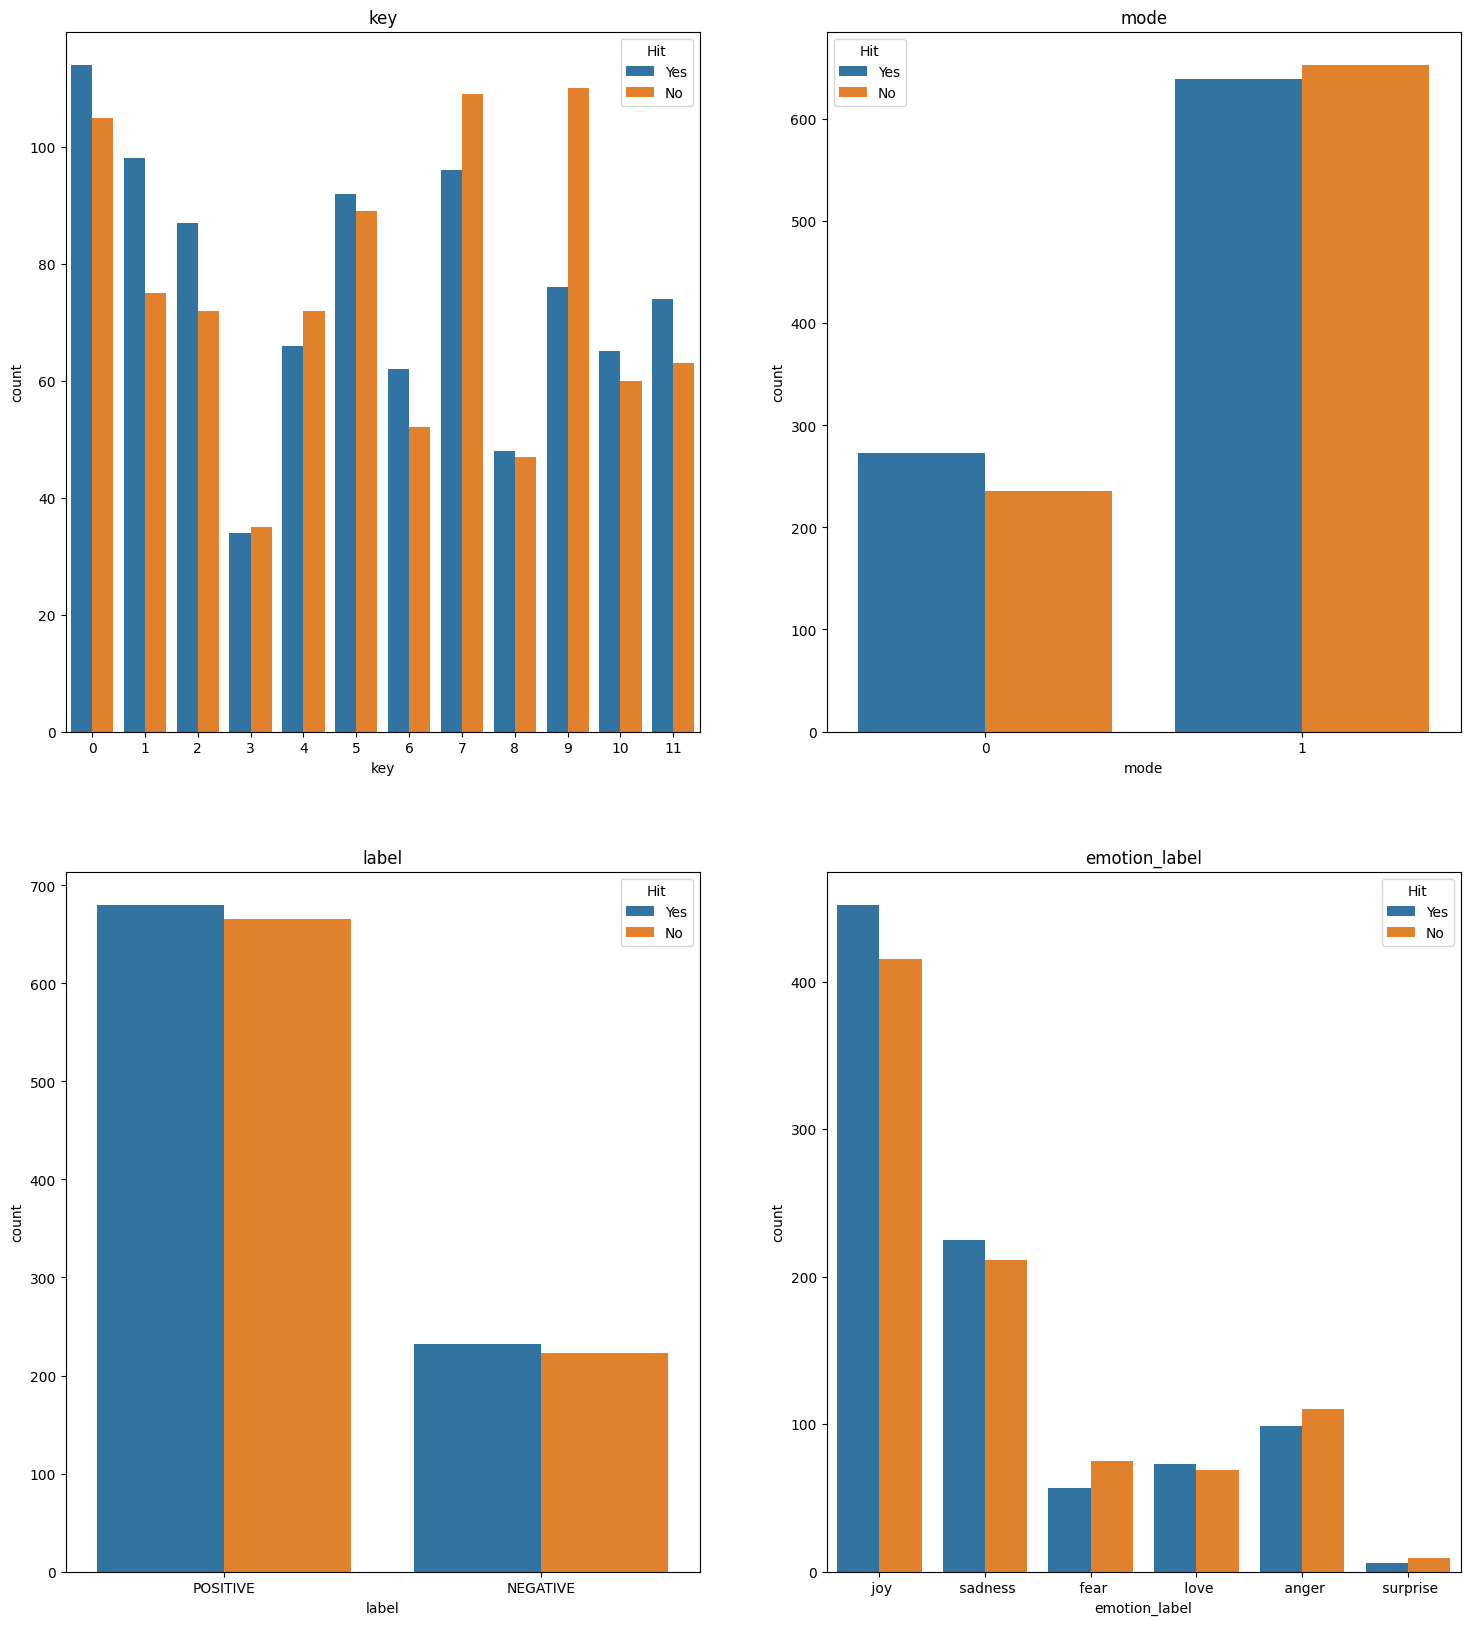

In [ ]:
plt.figure(figsize=(18,20))
i = 1
for features in categorical[:-1]:
    plt.subplot(2,2,i)
    sns.countplot(x=df[features],hue=data.Hit).set_title(features)
    i=i+1
plt.show()

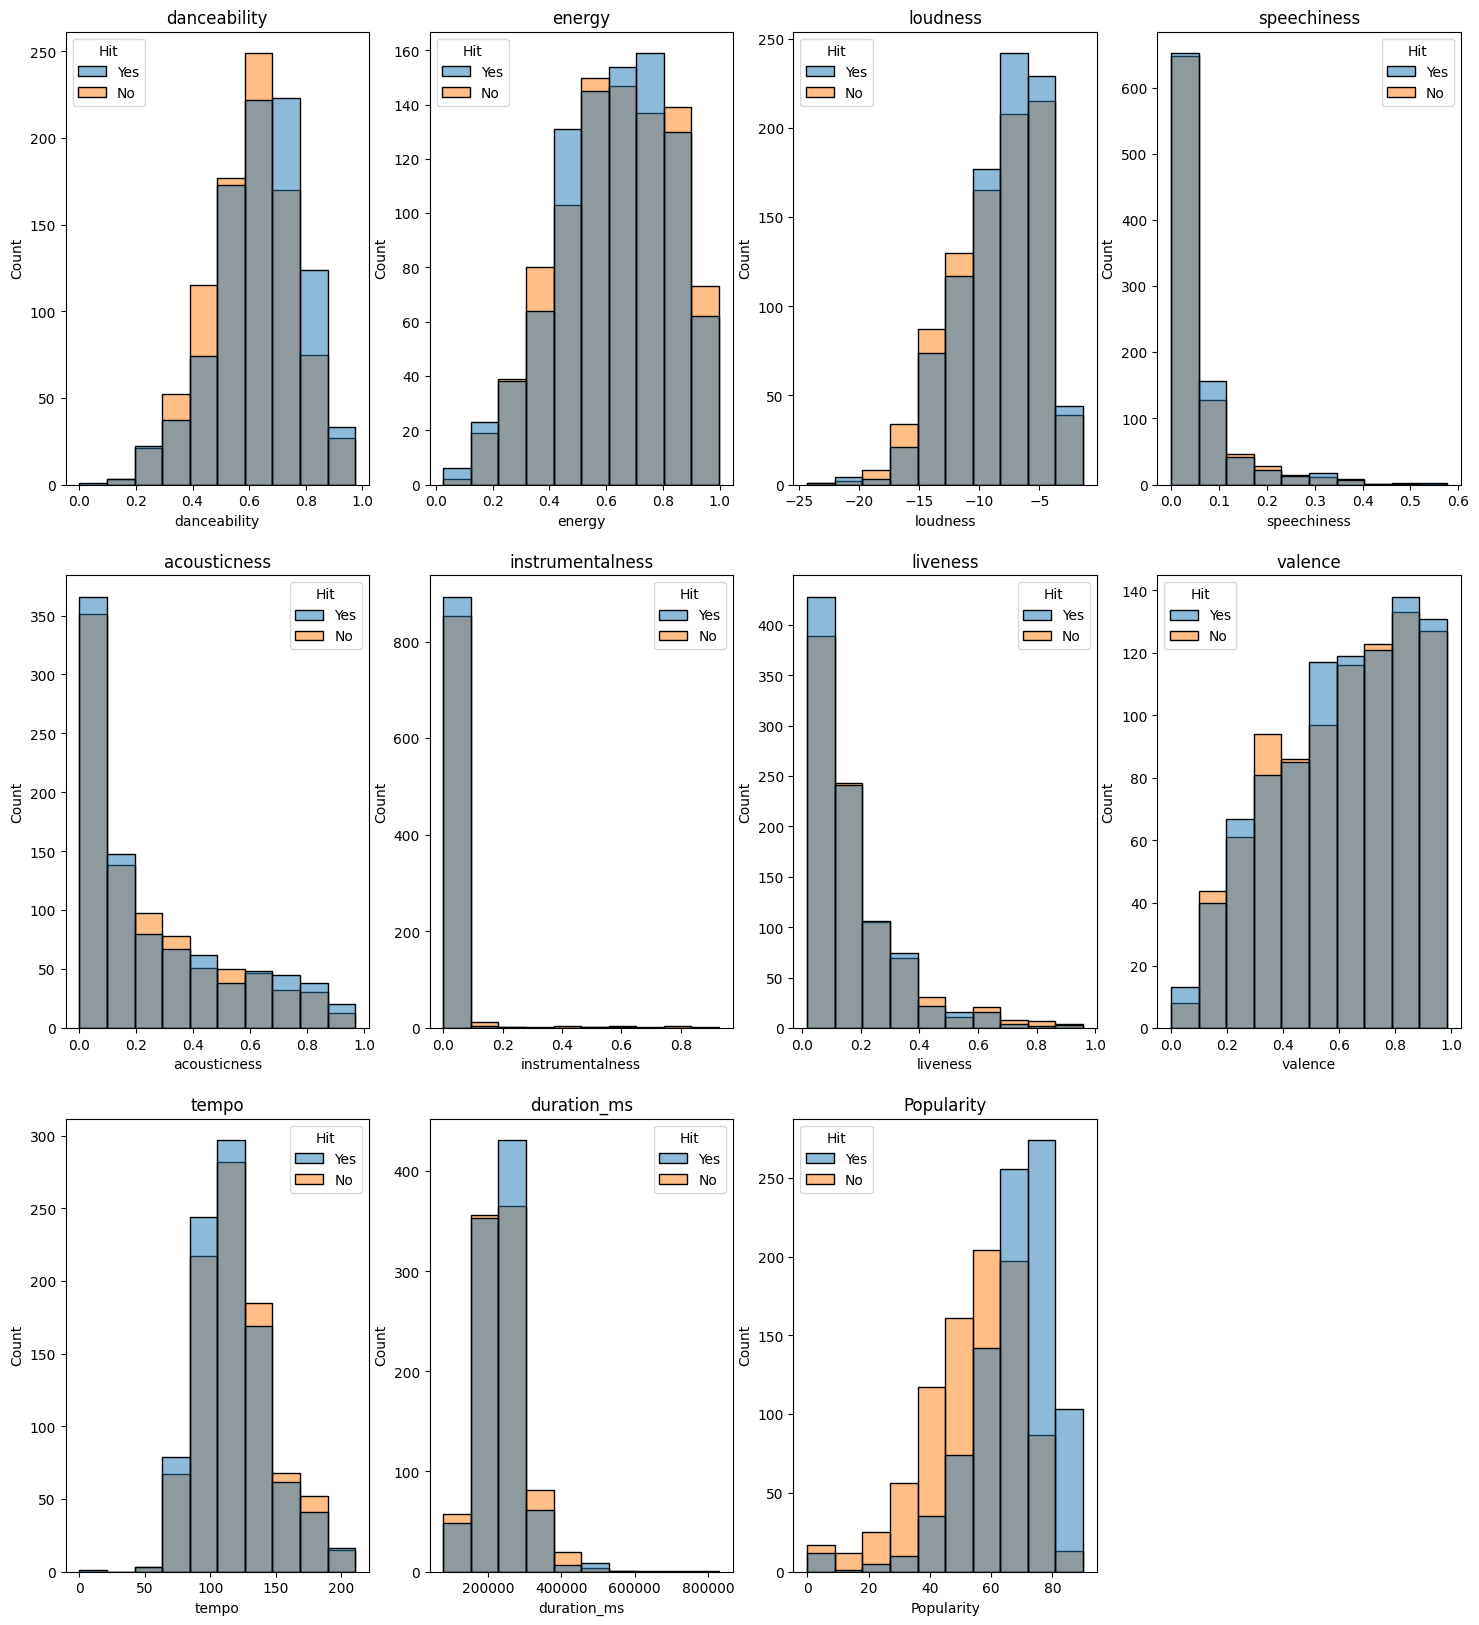

In [ ]:
plt.figure(figsize=(18,20))
i = 1
for features in numeric:
    plt.subplot(3,4,i)
    sns.histplot(x=df[features],hue= df.Hit, bins=10).set_title(features)
    i=i+1
plt.show()

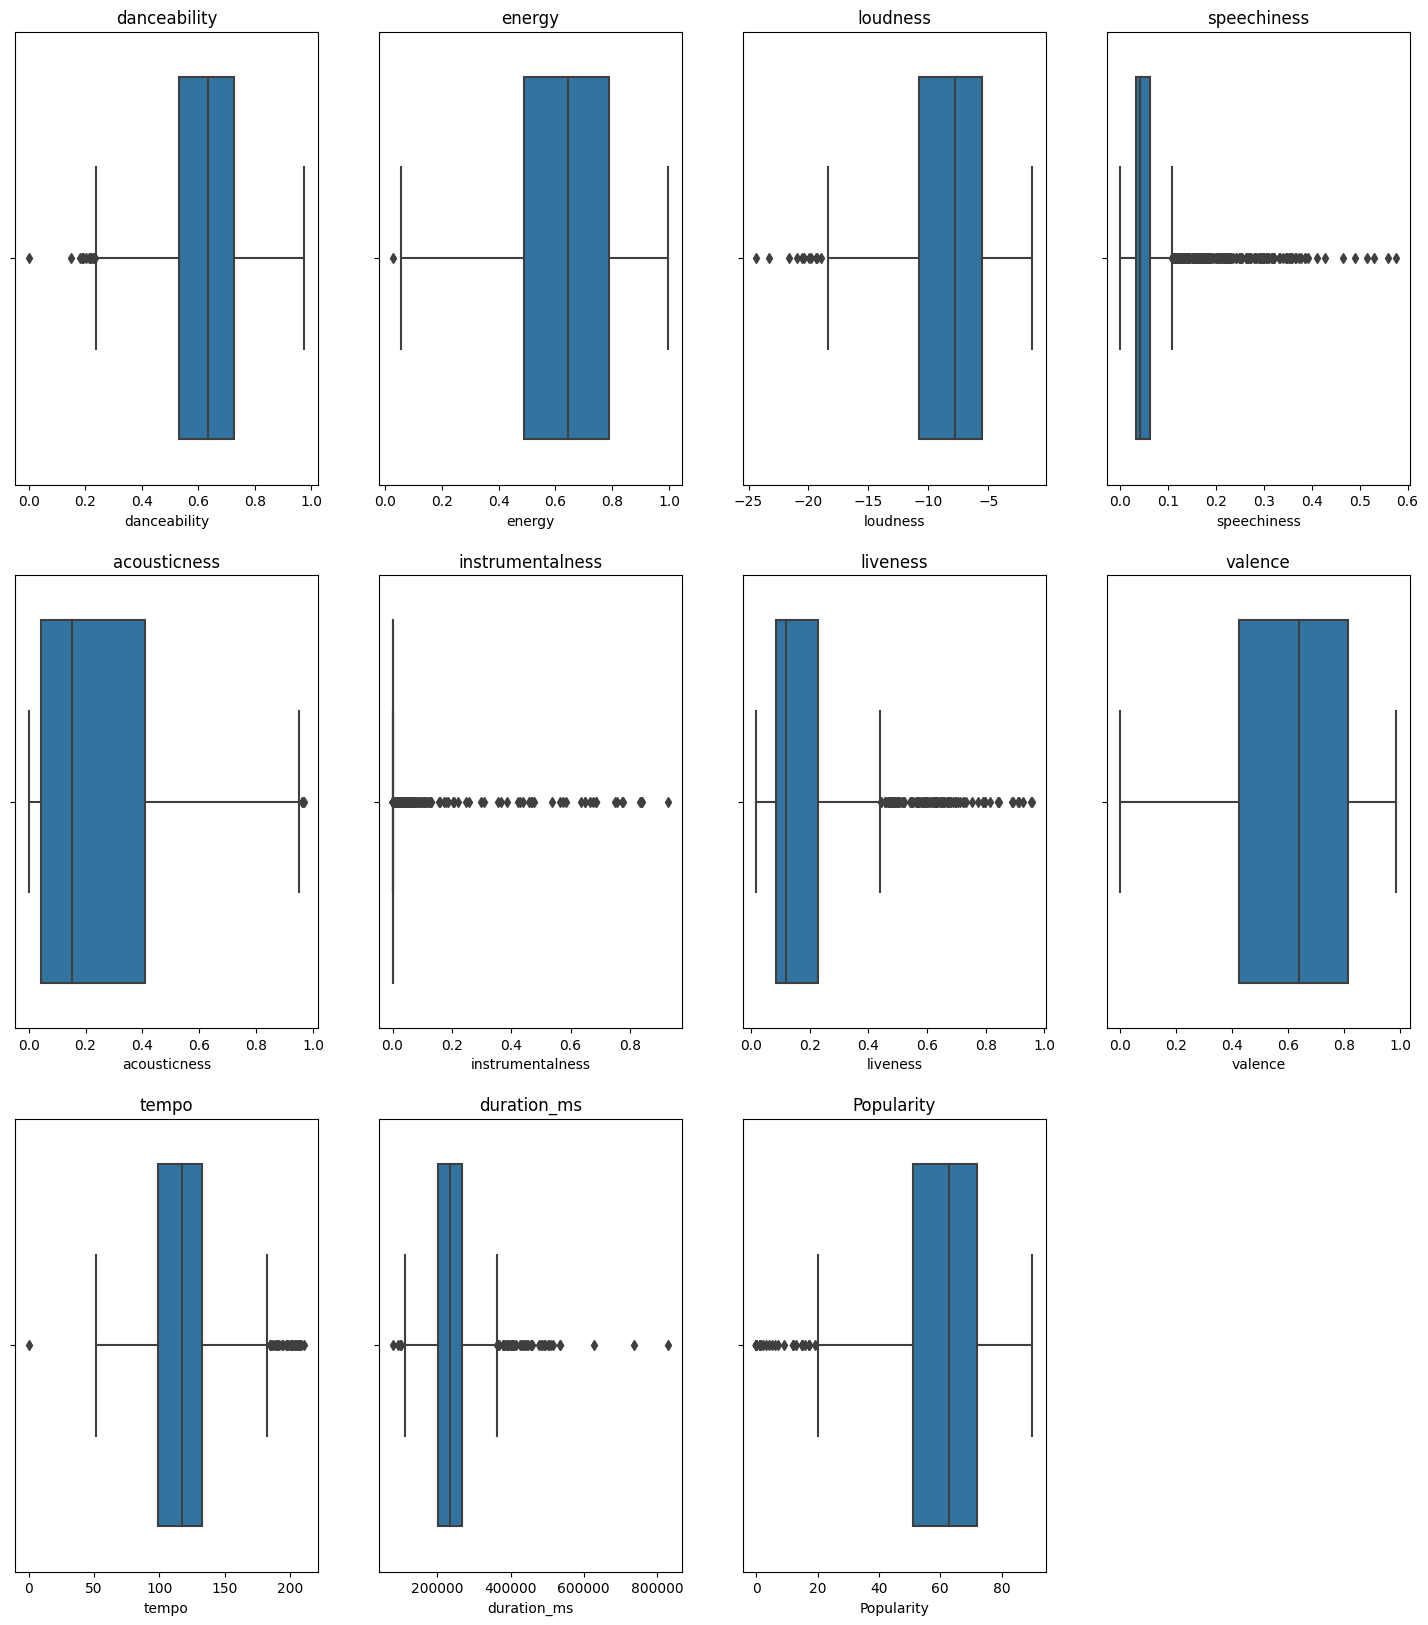

In [ ]:
plt.figure(figsize=(18,20))
i = 1
for features in numeric:
    plt.subplot(3,4,i)
    sns.boxplot(x=df[features]).set_title(features)
    i=i+1
plt.show()

# Feature Engineering

# Import Dataset and Preprocessing Steps

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/dataset_ML.csv')

In [ ]:
df = df.drop(['genre', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_lines', 'sentiment','f_k_grade', 'difficult_words', 'num_dupes', 'number_of_tokens',
       'number_of_types', 'decades', 'stemmed_text', 'POS_tags', 'POS','values', 'pred'], axis=1)

In [ ]:
df = df.drop(['playlistID', 'TrackName', 'SampleURL', 'ReleaseYear', 'Genres', 'score'], axis=1)

In [ ]:
df.Hit = df.Hit.replace({'Yes': 1, 'No': 0})

In [ ]:
from collections import Counter

Counter(df.Hit)

Counter({1: 912, 0: 889})

In [ ]:
#df.label = df.label.replace({'POSITIVE': 1, 'NEGATIVE': 0})

In [ ]:
df.head(5)

,lyrics,title,artist,TrackID,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,Popularity,label,emotion_label,Hit
0,look into my eyes you will seewhat you mean t...,(Everything I Do) I Do It For You,Bryan Adams,1Eb90nmqTrxylKFhcUzW8P,0.533,0.360,-12.633,0.0282,0.0805,0.000010,0.0631,0.299,131.229,1,1,393640,77.0,POSITIVE,joy,1
1,i can't get no satisfactioni can't get no sati...,(I Can't Get No) Satisfaction,Rolling Stones,2PzU4IB8Dr6mxV3lHuaG34,0.723,0.863,-7.890,0.0338,0.0383,0.031700,0.1280,0.931,136.302,2,1,222813,78.0,NEGATIVE,joy,1
2,our life together is so precious togetherwe ha...,(Just Like) Starting Over,John Lennon,5y0YreEOnQiKFAnCrcFIXz,0.701,0.790,-6.160,0.0725,0.3010,0.000061,0.1790,0.421,99.104,9,1,236547,61.0,POSITIVE,joy,1
3,love is higher than a mountain love is thicker...,(Love Is) Thicker Than Water,Andy Gibb,3jdBf1cJ2QmTzNUixplppA,0.582,0.462,-9.882,0.0254,0.1370,0.000050,0.0755,0.528,96.361,6,0,255960,47.0,POSITIVE,sadness,1
4,sittin' in the morning suni'll be sittin' when...,(Sittin' On) The Dock Of The Bay,Otis Redding,3zBhihYUHBmGd2bcQIobrF,0.769,0.367,-11.226,0.0312,0.6840,0.000016,0.0810,0.535,103.621,2,1,163756,80.0,NEGATIVE,joy,1


In [ ]:
Counter(df.label)

Counter({'POSITIVE': 1346, 'NEGATIVE': 455})

In [ ]:
Counter(df.emotion_label)

Counter({' joy': 867,
         ' sadness': 436,
         ' fear': 132,
         ' love': 142,
         ' anger': 209,
         ' surprise': 15})

In [ ]:
#df.emotion_label = df.emotion_label.replace({' sadness': 0, ' joy': 1, ' love': 2, ' anger': 3, ' fear': 4, ' surprise': 5})

In [ ]:
df = df.drop(['title','artist','TrackID'],axis=1)

In [ ]:
df.columns

Index(['lyrics', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key', 'mode', 'duration_ms', 'Popularity', 'label', 'emotion_label',
       'Hit'],
      dtype='object')

In [ ]:
df['label'] = df['label'].astype("category")

In [ ]:
df['emotion_label'] = df['emotion_label'].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   lyrics            1801 non-null   object  
 1   danceability      1801 non-null   float64 
 2   energy            1801 non-null   float64 
 3   loudness          1801 non-null   float64 
 4   speechiness       1801 non-null   float64 
 5   acousticness      1801 non-null   float64 
 6   instrumentalness  1801 non-null   float64 
 7   liveness          1801 non-null   float64 
 8   valence           1801 non-null   float64 
 9   tempo             1801 non-null   float64 
 10  key               1801 non-null   int64   
 11  mode              1801 non-null   int64   
 12  duration_ms       1801 non-null   int64   
 13  Popularity        1801 non-null   float64 
 14  label             1801 non-null   category
 15  emotion_label     1801 non-null   category
 16  Hit               1801 n

# Preprocessing the Text data

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Assuming you have a 'lyrics' column containing the text data
df['lyrics'] = df['lyrics'].apply(preprocess_text)

# Splitting the data into dependent and independent features

In [ ]:
X = df.drop('Hit',axis=1)

In [ ]:
X.columns

Index(['lyrics', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key', 'mode', 'duration_ms', 'Popularity', 'label', 'emotion_label'],
      dtype='object')

In [ ]:
y = df["Hit"]

# TF-IDF Vectorizer for Text Data

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_text = tfidf_vectorizer.fit_transform(X['lyrics'])

# Combine Text- & Numeric Features

In [ ]:
# Combine Text- & Numeric Features
X_combined = pd.concat([X.drop('lyrics', axis=1), pd.DataFrame(X_text.toarray())], axis=1)

# Training- & Testsplit

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.20)

# Model Selection

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier = XGBClassifier(enable_categorical=True, tree_method='hist')

# Import Randomized Search Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter Selection

In [ ]:
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [ ]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
classifier= XGBClassifier(enable_categorical=True, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [ ]:
cross = cross_val_score(classifier, x_train, y_train, cv=10, verbose=0)

In [ ]:
print("Accuracy after cross validation is: {}".format(cross.mean()*100))

Accuracy after cross validation is: 67.36111111111111


# Prediction

In [ ]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       172
           1       0.72      0.70      0.71       189

    accuracy                           0.70       361
   macro avg       0.70      0.70      0.70       361
weighted avg       0.70      0.70      0.70       361



Text(50.722222222222214, 0.5, 'Actual')

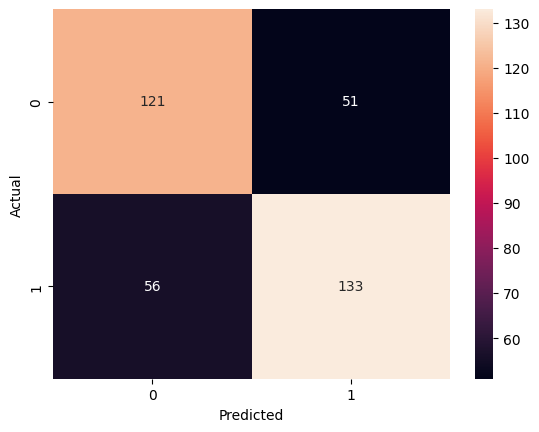

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance

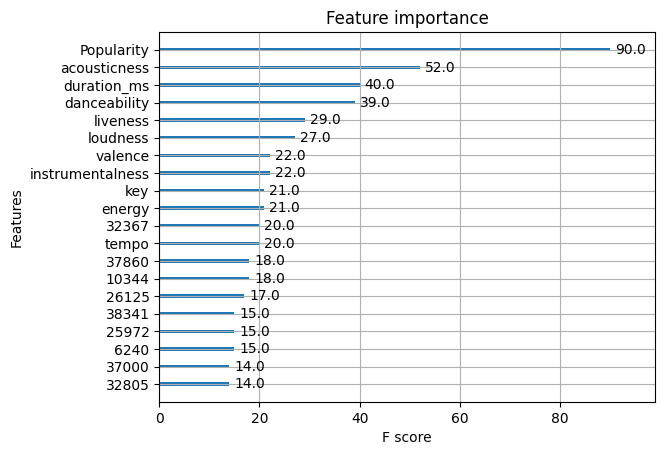

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(classifier, max_num_features=20)  # Set max_num_features to 5
plt.rcParams['figure.figsize'] = [6, 4]  # Adjust the figure size if needed
plt.show()


# Test with another tree-method

In [ ]:
classifier = XGBClassifier(enable_categorical=True, tree_method='gpu_hist')

In [ ]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
classifier= XGBClassifier(enable_categorical=True, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [ ]:
cross = cross_val_score(classifier, x_train, y_train, cv=10, verbose=0)

In [ ]:
print("Accuracy after cross validation is: {}".format(cross.mean()*100))

Accuracy after cross validation is: 67.0138888888889


# Prediction

In [ ]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       198
           1       0.65      0.72      0.68       163

    accuracy                           0.70       361
   macro avg       0.70      0.70      0.69       361
weighted avg       0.70      0.70      0.70       361



Text(50.722222222222214, 0.5, 'Actual')

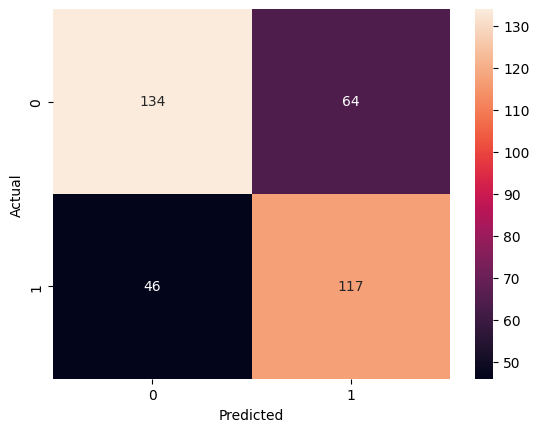

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance

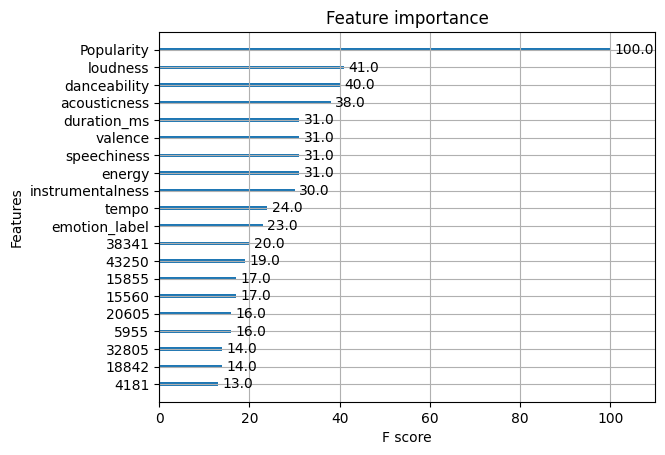

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(classifier, max_num_features=20)  # Set max_num_features to 5
plt.rcParams['figure.figsize'] = [6, 4]  # Adjust the figure size if needed
plt.show()
